
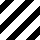
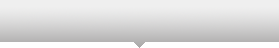
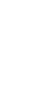
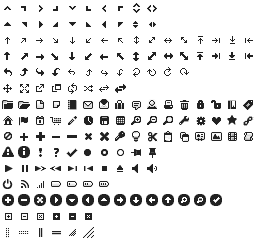
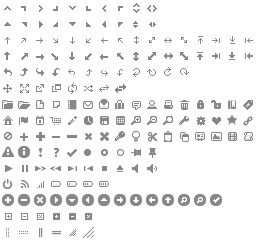
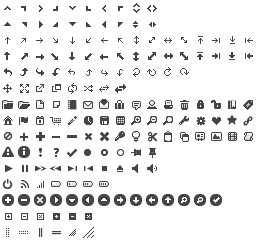
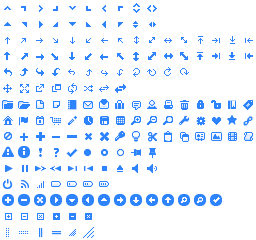
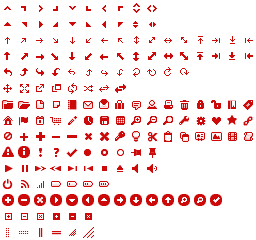
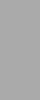
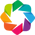
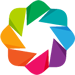
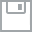
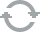
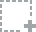
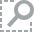
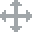
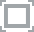
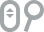

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

import sys
sys.path.append( '/Users/bpb/Data/programming/OpenMSI/openmsi-programmatic-access/' )
import openmsi

from matplotlib import pyplot as plt
import requests, json
import numpy as np
from bokeh.plotting import *
output_notebook()




In [2]:
client = requests.Session()

In [3]:
client = openmsi.authenticateUser(client,'bpb') # put your username here in the quotes

##### Test that we are authenticated #####
##### by printing a list of files #####
##### you have access to #####
myFiles = openmsi.getFilelist(client)
for k in myFiles:
    print k

········
/project/projectdirs/openmsi/omsi_data_private/bpb/20110426_Liver_00hrs.h5
/project/projectdirs/openmsi/omsi_data_private/bpb/Challenge_2W_v7.h5
/project/projectdirs/openmsi/omsi_data_private/bpb/20140512_KBL_NP_EColi_cosmid_ACNex_super_pel_super_70SS_15nL.h5
/project/projectdirs/openmsi/omsi_data_private/raad0102/20150427MdR_Chemical_Screen_3_try2.h5
/project/projectdirs/openmsi/omsi_data_private/bpb/20140828_KBL_4and2_topchip_2D2O_nodebri2_TI.h5
/project/projectdirs/openmsi/omsi_data_private/bpb/Flax_Pod_7_day_old_CS.h5
/project/projectdirs/openmsi/omsi_data_private/bpb/20140801_myxovbsurf.h5
/project/projectdirs/openmsi/omsi_data_private/bpb/20121210_RCH2MR1_1day_K_lines.h5
/project/projectdirs/openmsi/omsi_data_private/bpb/20121012_lipid_extracts.h5
/project/projectdirs/openmsi/omsi_data_private/bpb/20140425_KBL_NP_acousticprint_test_9x9_70micronss.h5
/project/projectdirs/openmsi/omsi_data_private/bpb/2012_0403_KBL_platename_SN1.h5
/project/projectdirs/openmsi/omsi_data_pr

In [4]:
filename = '/project/projectdirs/openmsi/omsi_data_private/raad0102/20150623MdR_Leslie_Isolates_plate_3.h5'
dataIndex = '0'
expIndex = '0'

In [5]:
payload = {'file':filename,
          'expIndex':expIndex,'dataIndex':dataIndex,'qspectrum_viewerOption':'0',
          'qslice_viewerOption':'0',
          'col':0,'row':0,
          'findPeak':'0','format':'JSON'}
url = 'https://openmsi.nersc.gov/openmsi/qmz'
r = client.get(url,params=payload)
data = json.loads(r.content)
mz = np.asarray(data[u'values_spectra'])

In [6]:
myRow1 = 22
myCol1 = 183
payload = {'file':filename,
              'expIndex':expIndex,'dataIndex':dataIndex,'qspectrum_viewerOption':'0',
              'qslice_viewerOption':'0',
              'col':myCol1,'row':myRow1,
              'findPeak':'0','format':'JSON'}
url = 'https://openmsi.nersc.gov/openmsi/qspectrum'
r = client.get(url,params=payload)
data = json.loads(r.content)
intensity1  = data[u'spectrum']

In [7]:
myRow2 = 24
myCol2 = 147
payload = {'file':filename,
              'expIndex':expIndex,'dataIndex':dataIndex,'qspectrum_viewerOption':'0',
              'qslice_viewerOption':'0',
              'col':myCol2,'row':myRow2,
              'findPeak':'0','format':'JSON'}
url = 'https://openmsi.nersc.gov/openmsi/qspectrum'
r = client.get(url,params=payload)
data = json.loads(r.content)
intensity2  = data[u'spectrum']

In [8]:
diff_spectra = []
for i,i1 in enumerate(intensity1):
    diff_spectra.append(intensity1[i] - intensity2[i])

In [9]:
# create a new plot with a title and axis labels
p = figure( title='Spectrum at location [%d,%d] minus location [%d,%d]'%(myRow1,myCol1,myRow2,myCol2), x_axis_label='m/z', y_axis_label='Intensity',plot_width=1000, plot_height=500,)

# add a line renderer with legend and line thickness
# p.line(x, y, legend="Temp.", line_width=2)
p.line(mz,diff_spectra , y_range=[0,1.05*np.max(intensity1)])

show(p)